<a href="https://colab.research.google.com/github/IsidoraJevremovic/osnovi-astronomije/blob/main/11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import h, c, k_B
from astropy import units as u

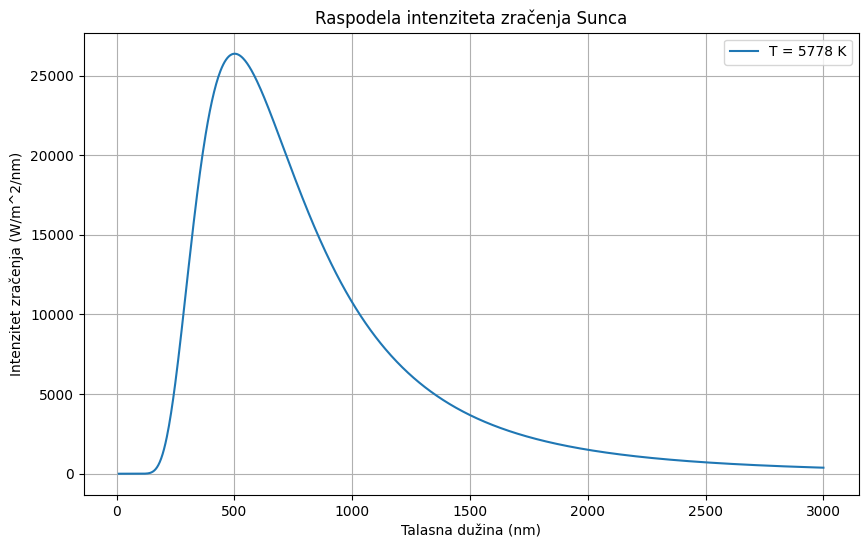

Talasna dužina maksimalnog intenziteta Sunca: 500.85 nm
Boja koja odgovara talasnoj dužini maksimalnog intenziteta: zelena


In [7]:
def planck_function(lambda_m, T):
    """Izračunavanje Planckove funkcije za zadatu talasnu dužinu (u metrima) i temperaturu."""
    # Konvertujemo talasnu dužinu u jedinicu metara
    lambda_m = lambda_m * u.m
    # Konvertujemo temperaturu u jedinicu Kelvina
    T = T * u.K

    # Izračunavamo Planckovu funkciju
    intensity = (2 * h * c**2 / lambda_m**5) / (np.exp((h * c) / (lambda_m * k_B * T)) - 1)

    # Vraćamo intenzitet u jedinicama W/m^2/nm (konvertujemo na kraju)
    return intensity.to(u.W / (u.m**2 * u.nm))

T_sun = 5778

wavelengths_nm = np.linspace(10, 3000, 1000)
wavelengths_m = wavelengths_nm * 1e-9

intensities = planck_function(wavelengths_m, T_sun)

plt.figure(figsize=(10, 6))
plt.plot(wavelengths_nm, intensities, label=f'T = {T_sun} K')
plt.xlabel('Talasna dužina (nm)')
plt.ylabel('Intenzitet zračenja (W/m^2/nm)')
plt.title('Raspodela intenziteta zračenja Sunca')
plt.legend()
plt.grid(True)
plt.show()

max_intensity_index = np.argmax(intensities)
max_wavelength_nm = wavelengths_nm[max_intensity_index]

print(f'Talasna dužina maksimalnog intenziteta Sunca: {max_wavelength_nm:.2f} nm')

if 380 <= max_wavelength_nm <= 450:
    color = "ljubičasta"
elif 450 < max_wavelength_nm <= 495:
    color = "plava"
elif 495 < max_wavelength_nm <= 570:
    color = "zelena"
elif 570 < max_wavelength_nm <= 590:
    color = "žuta"
elif 590 < max_wavelength_nm <= 620:
    color = "narandžasta"
elif 620 < max_wavelength_nm <= 750:
    color = "crvena"
else:
    color = "izvan vidljivog spektra"

print(f'Boja koja odgovara talasnoj dužini maksimalnog intenziteta: {color}')